# 0 Exploratory Data Analysis 

This project aims to recreate the results described in "Mining Big Data to Extract Patterns and Predict Real-Life Outcomes" by Michal Kosinski, Yilun Wang, Himabindu Lakkaraju, and Jure Leskovec. I will refer to them as "Authors" in my notebooks.<br>

You can find out more about the original paper here:
https://www.michalkosinski.com/data-mining-tutorial

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.simplefilter(action='ignore', category=UserWarning)

Let's load our data:

In [2]:
users = pd.read_csv('sample_dataset/users.csv')

In [3]:
users

,userid,gender,age,political,ope,con,ext,agr,neu
0,54f34605aebd63f7680e37ffd299af79,0,33,0.0,1.26,1.65,1.17,-1.76,0.61
1,86399f8c44ba54224b2e60177ca89fa9,1,35,0.0,1.07,0.17,-0.14,1.49,0.30
2,84fab50f3c60d1fdc83aa91b5e584a78,1,36,0.0,0.89,1.28,0.86,1.07,0.99
3,f3b8fdaccce12ef6352bfad4d6052fe9,0,39,NaN,0.33,-1.01,-0.33,-0.68,0.92
4,8b06ea5e9cb87c61da387995450607f7,0,31,NaN,0.15,0.47,1.17,-1.01,-0.32
...,...,...,...,...,...,...,...,...,...
110723,b66b3c8bbc513c44ed42510a2d2c89de,1,26,NaN,1.04,0.69,0.54,-1.51,0.56
110724,92f3fb356a32c5313b19c586a314aec4,1,22,NaN,-0.54,-1.38,-0.58,-2.17,0.36
110725,35423376439d56fd234c895495366421,0,33,NaN,-0.72,0.84,1.48,-0.84,0.11
110726,ea5865fed26ae706719b1ea338122fa8,1,22,NaN,1.16,0.32,-0.71,0.41,0.50


In [4]:
users.shape

(110728, 9)

In [5]:
users.head()

,userid,gender,age,political,ope,con,ext,agr,neu
0,54f34605aebd63f7680e37ffd299af79,0,33,0.0,1.26,1.65,1.17,-1.76,0.61
1,86399f8c44ba54224b2e60177ca89fa9,1,35,0.0,1.07,0.17,-0.14,1.49,0.30
2,84fab50f3c60d1fdc83aa91b5e584a78,1,36,0.0,0.89,1.28,0.86,1.07,0.99
3,f3b8fdaccce12ef6352bfad4d6052fe9,0,39,NaN,0.33,-1.01,-0.33,-0.68,0.92
4,8b06ea5e9cb87c61da387995450607f7,0,31,NaN,0.15,0.47,1.17,-1.01,-0.32


As we can see users.csv file contains psychodemographic user data. We notice already that some values are missing, so let's take a closer look.

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110728 entries, 0 to 110727
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userid     110728 non-null  object 
 1   gender     110728 non-null  int64  
 2   age        110728 non-null  int64  
 3   political  27808 non-null   float64
 4   ope        110728 non-null  float64
 5   con        110728 non-null  float64
 6   ext        110728 non-null  float64
 7   agr        110728 non-null  float64
 8   neu        110728 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 7.6+ MB


In [7]:
users.describe()

,gender,age,political,ope,con,ext,agr,neu
count,110728.000000,110728.000000,27808.000000,110728.000000,110728.000000,110728.00000,110728.000000,110728.000000
mean,0.559524,29.710534,0.361155,0.028386,-0.005419,-0.01115,0.000883,0.006901
std,0.496446,7.919357,0.480344,0.993904,0.998988,1.00165,0.999586,1.003009
min,0.000000,18.000000,0.000000,-5.490000,-3.670000,-3.08000,-4.340000,-2.130000
25%,0.000000,25.000000,0.000000,-0.590000,-0.720000,-0.71000,-0.590000,-0.760000
50%,1.000000,27.000000,0.000000,0.150000,0.020000,0.11000,0.070000,-0.070000
75%,1.000000,32.000000,1.000000,0.790000,0.690000,0.73000,0.740000,0.740000
max,1.000000,80.000000,1.000000,1.900000,2.240000,1.92000,2.320000,2.850000


In [8]:
print("Number of distinct values per feature:")
users.nunique()

Number of distinct values per feature:


userid       110728
gender            2
age              63
political         2
ope             202
con             218
ext             227
agr             211
neu             227
dtype: int64

In [9]:
print("Missing values:")
users.isnull().sum()

Missing values:


userid           0
gender           0
age              0
political    82920
ope              0
con              0
ext              0
agr              0
neu              0
dtype: int64

Cells above tell us that:
- all data is numerical
- 'gender' ("0" - male, "1" - female) and 'political' ("0" - Democrat, "1" - Republican) features are orderly
- 82920 values for 'political' are missing (which in itself can be a feature as well)

Let's explore our data a little.

## Age

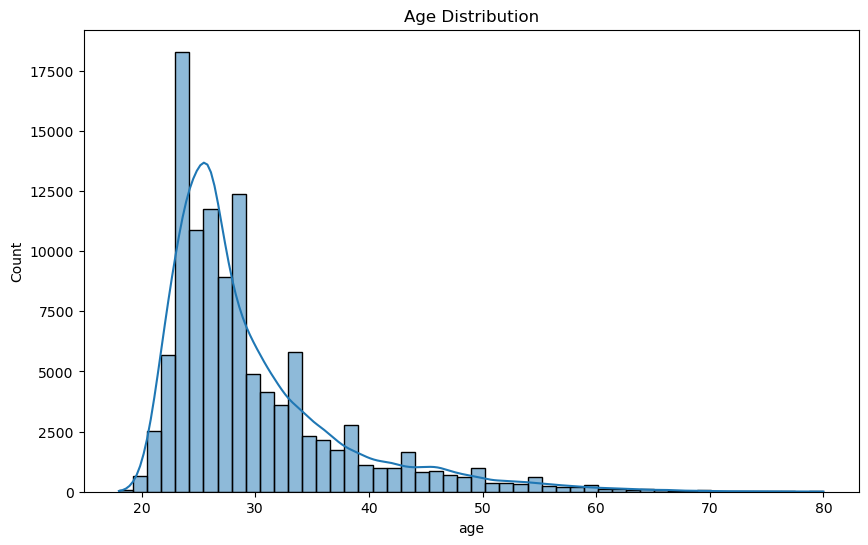

In [10]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(users['age'], bins=50, kde=True)
plt.title('Age Distribution')
plt.show()

## Gender

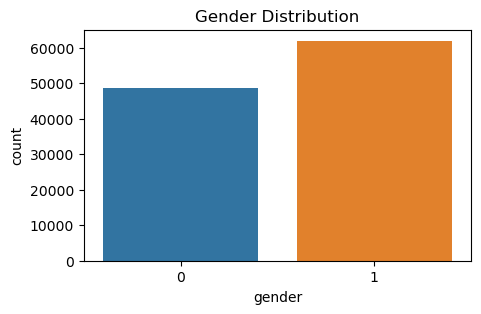

In [11]:
# Gender distribution
plt.figure(figsize=(5, 3))
sns.countplot(x='gender', data=users)
plt.title('Gender Distribution')
plt.show()

## Political affiliation distribution

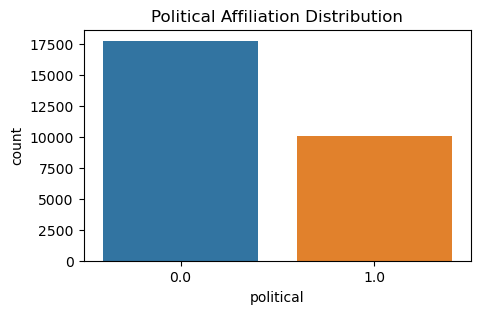

In [12]:
# Political affiliation distribution
plt.figure(figsize=(5, 3))
sns.countplot(x='political', data=users)
plt.title('Political Affiliation Distribution')
plt.show()

## Psychological features

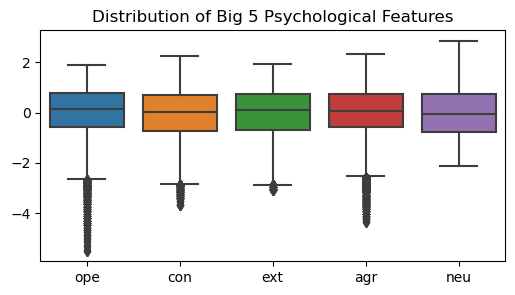

In [13]:
# Box plots for Big 5 features
big5_features = ['ope', 'con', 'ext', 'agr', 'neu']
plt.figure(figsize=(6, 3))
sns.boxplot(data=users[big5_features])
plt.title('Distribution of Big 5 Psychological Features')
plt.show()

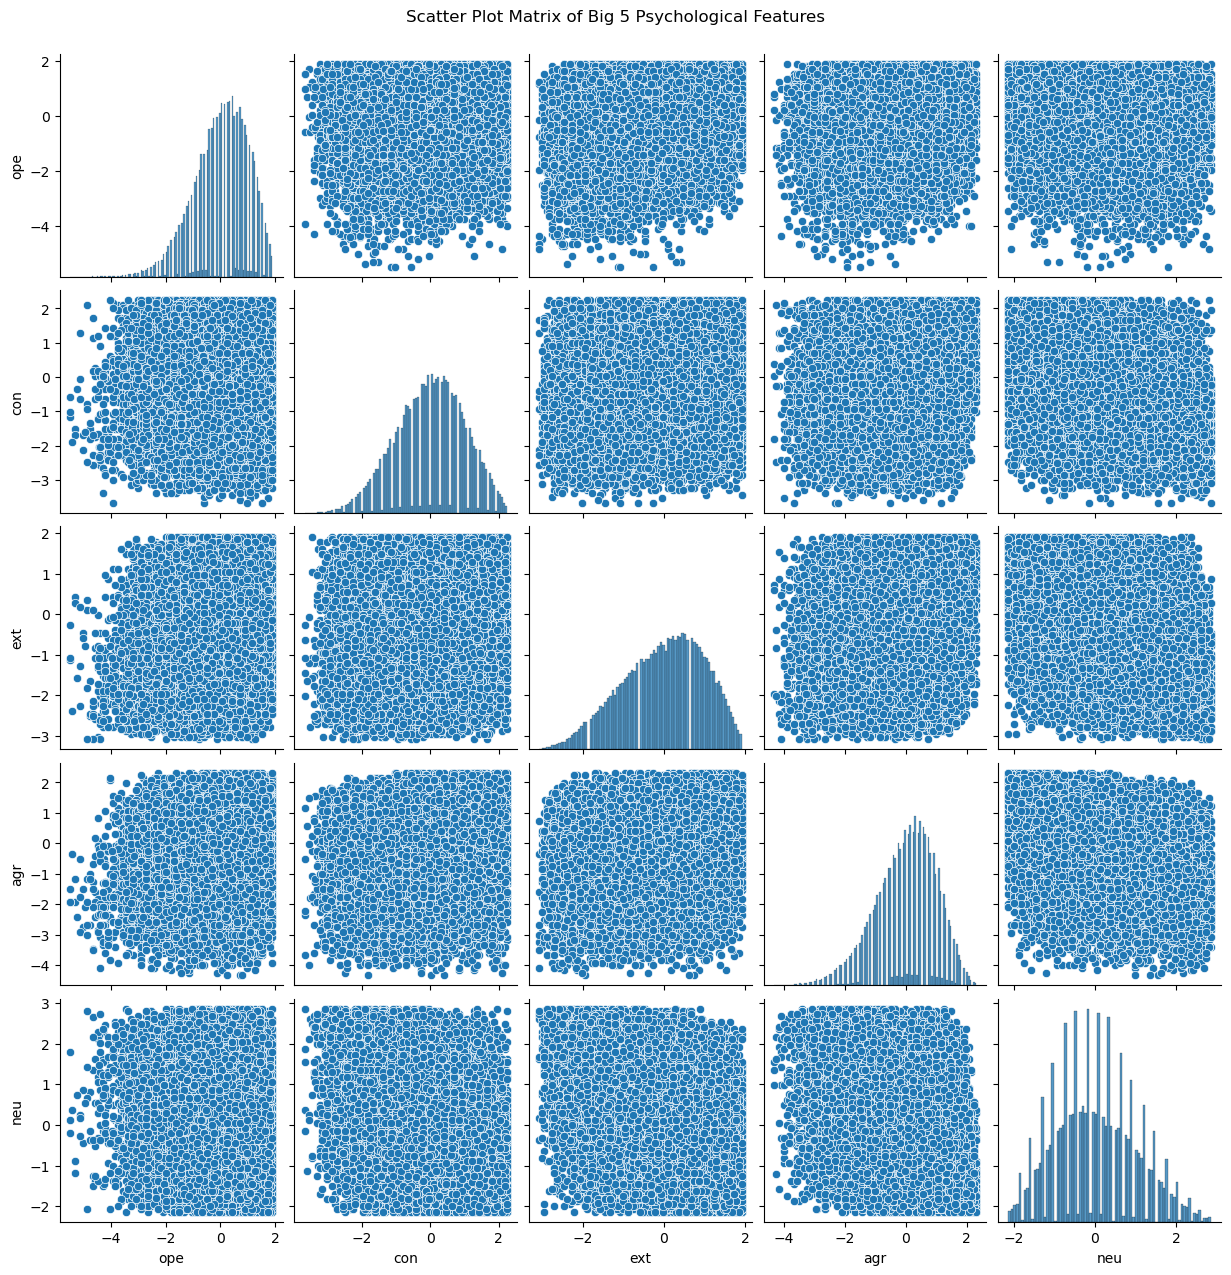

In [14]:
# Scatter plot matrix for Big 5 features
sns.pairplot(users[big5_features])
plt.suptitle('Scatter Plot Matrix of Big 5 Psychological Features', y=1.02)
plt.show()

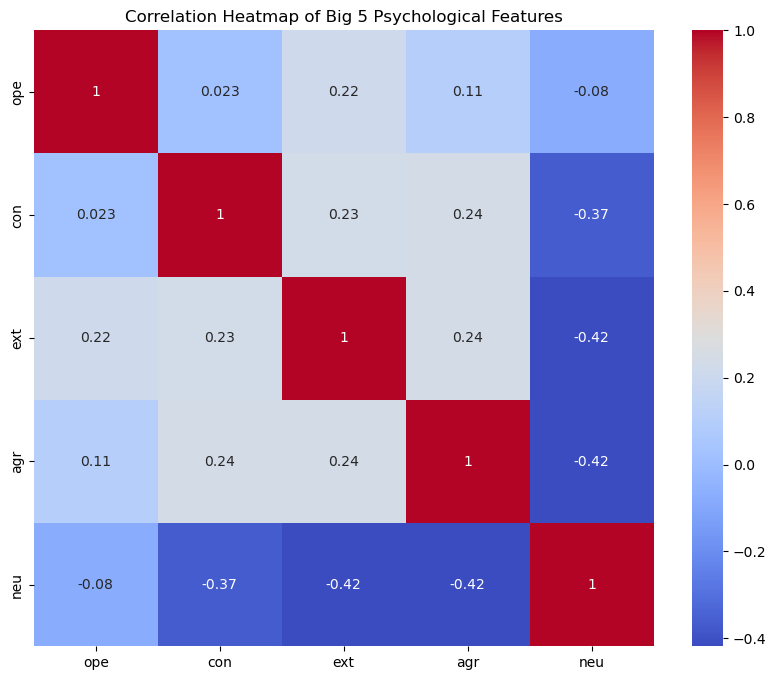

In [15]:
# Correlation heatmap for Big 5 psychological features
plt.figure(figsize=(10, 8))
sns.heatmap(users[big5_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Big 5 Psychological Features')
plt.show()

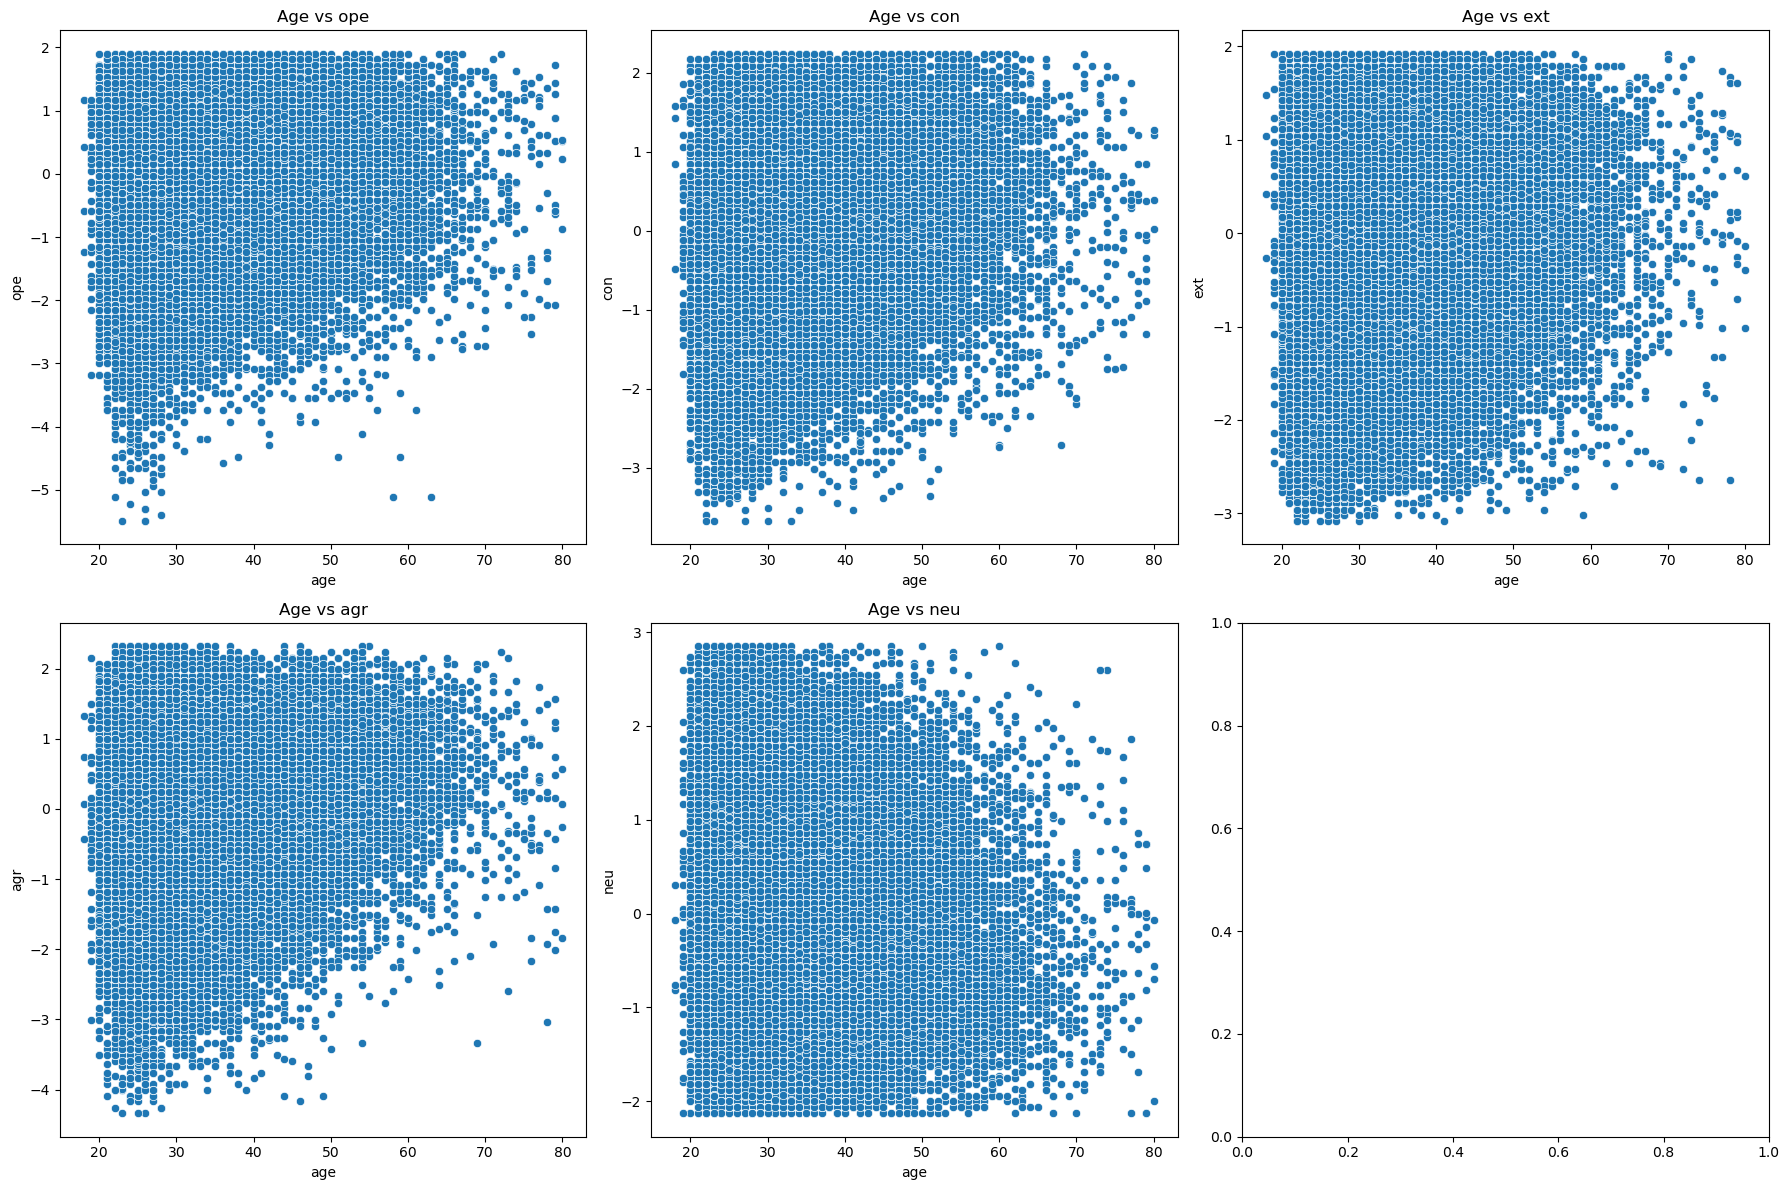

In [16]:
# Relationship between age and Big 5 features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(big5_features):
    sns.scatterplot(x='age', y=feature, data=users, ax=axes[i])
    axes[i].set_title(f'Age vs {feature}')

plt.tight_layout()
plt.show()

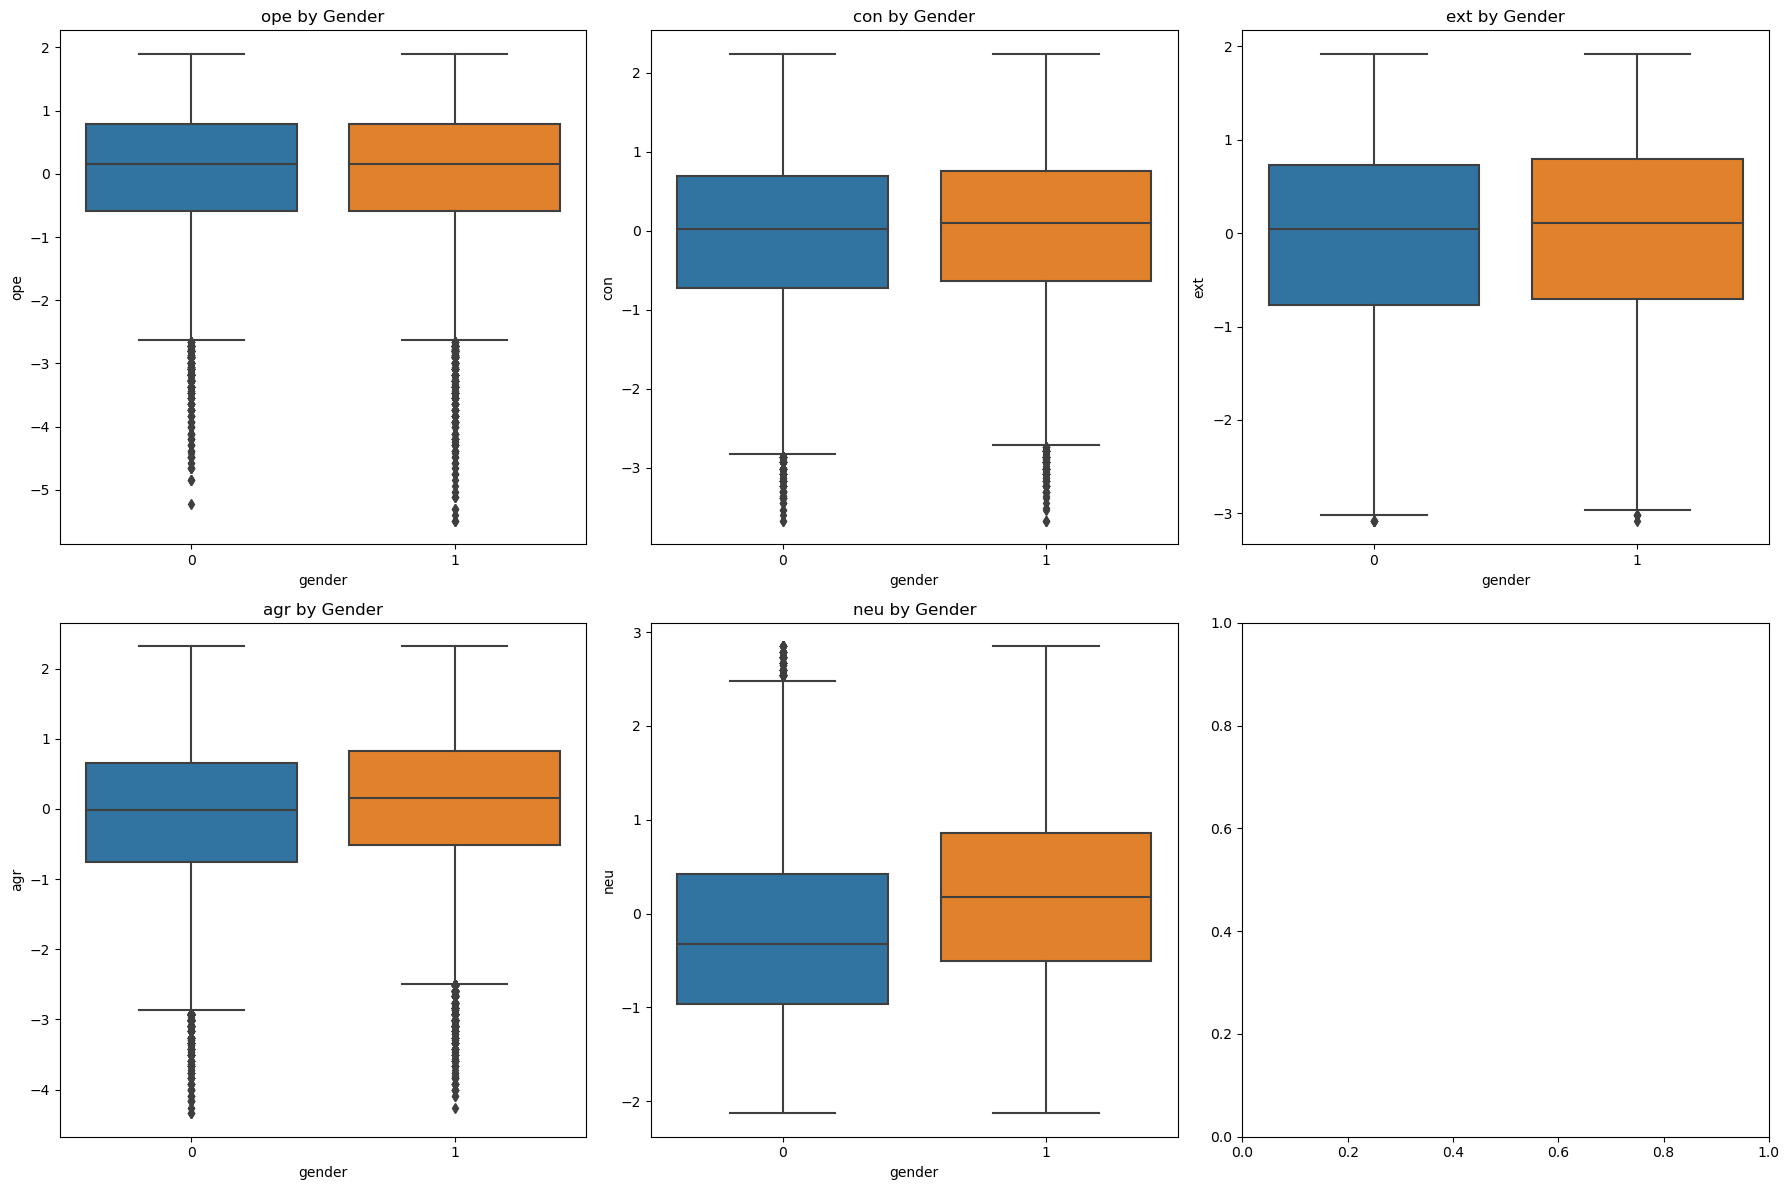

In [17]:
# Big 5 features by gender
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(big5_features):
    sns.boxplot(x='gender', y=feature, data=users, ax=axes[i])
    axes[i].set_title(f'{feature} by Gender')

plt.tight_layout()
plt.show()

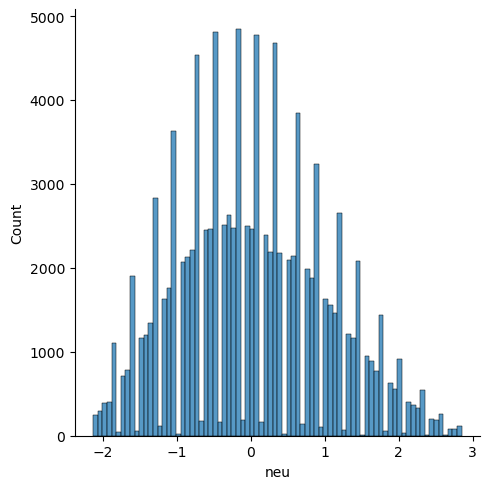

In [18]:
sns.displot(users['neu'])

<Figure size 1600x900 with 0 Axes>

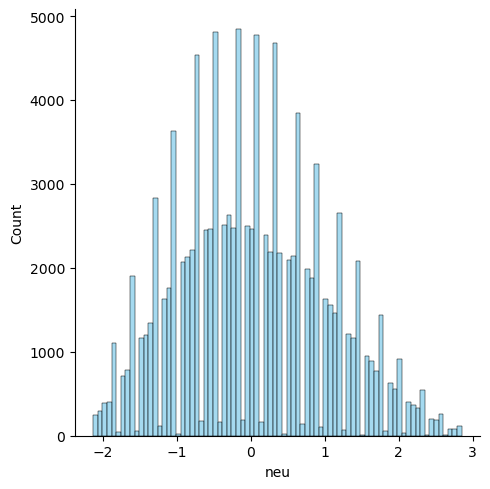

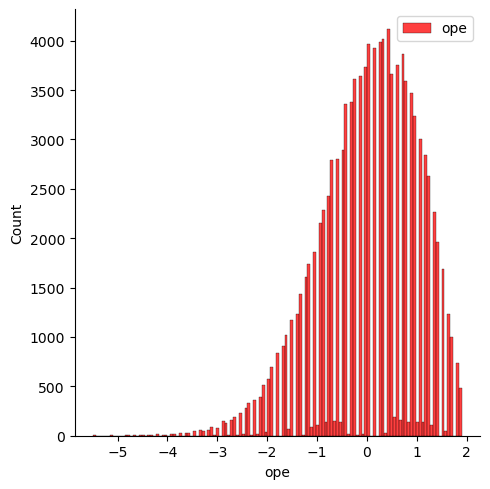

In [19]:
plt.figure(figsize=(16, 9))
sns.displot(users['neu'], color="skyblue", label="neu")
sns.displot(users['ope'], color="red", label="ope")
plt.legend()

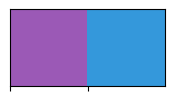

In [20]:
flatui = ["#9b59b6", "#3498db"]
sns.palplot(sns.color_palette(flatui))

<Axes: xlabel='political', ylabel='count'>

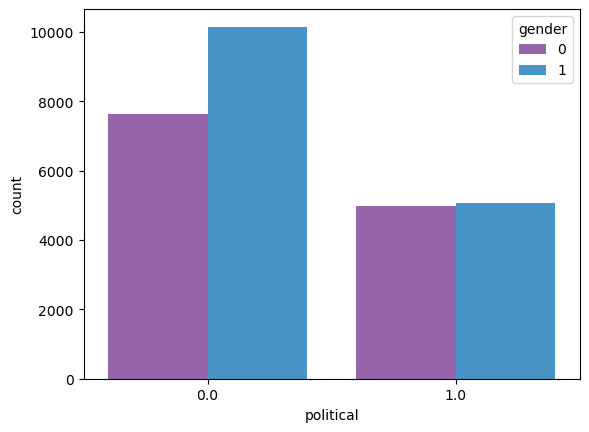

In [21]:
sns.countplot(x='political', hue='gender', data=users, palette=flatui)

As you can see, most users of our data declare their political preferences as "Democrats". Women and men declare their support for "Republicans" to a similar extent, while there are more women among those supporting "Democrats".

In [22]:
males_over_40 = users[(users['gender'] == 0) & (users['age'] > 40)]

In [23]:
females_under_25 = users[(users['gender'] == 1) & (users['age'] < 25)]

In [24]:
females_under_25.describe()

,gender,age,political,ope,con,ext,agr,neu
count,15061.0,15061.000000,2999.000000,15061.000000,15061.00000,15061.000000,15061.000000,15061.000000
mean,1.0,22.826638,0.363121,-0.015011,-0.26698,-0.009749,-0.051155,0.322698
std,0.0,1.121987,0.480980,0.946894,0.96771,0.991767,0.992995,0.977629
min,1.0,18.000000,0.000000,-5.490000,-3.67000,-2.960000,-4.260000,-2.130000
25%,1.0,22.000000,0.000000,-0.590000,-0.94000,-0.710000,-0.680000,-0.380000
50%,1.0,23.000000,0.000000,0.050000,-0.27000,0.110000,0.040000,0.300000
75%,1.0,24.000000,1.000000,0.700000,0.39000,0.730000,0.660000,1.050000
max,1.0,24.000000,1.000000,1.900000,2.24000,1.920000,2.320000,2.850000


In [25]:
males_over_40.describe()

,gender,age,political,ope,con,ext,agr,neu
count,3742.0,3742.000000,1048.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,0.0,48.782737,0.445611,0.061513,0.270305,-0.054973,-0.023677,-0.223124
std,0.0,7.129579,0.497270,1.045661,1.012830,1.027577,0.996875,0.995027
min,0.0,41.000000,0.000000,-4.480000,-3.530000,-3.080000,-4.170000,-2.130000
25%,0.0,43.000000,0.000000,-0.590000,-0.420000,-0.770000,-0.680000,-1.010000
50%,0.0,47.000000,0.000000,0.150000,0.380000,0.040000,0.070000,-0.320000
75%,0.0,52.000000,1.000000,0.890000,0.990000,0.730000,0.660000,0.490000
max,0.0,80.000000,1.000000,1.900000,2.240000,1.920000,2.320000,2.850000


<Axes: >

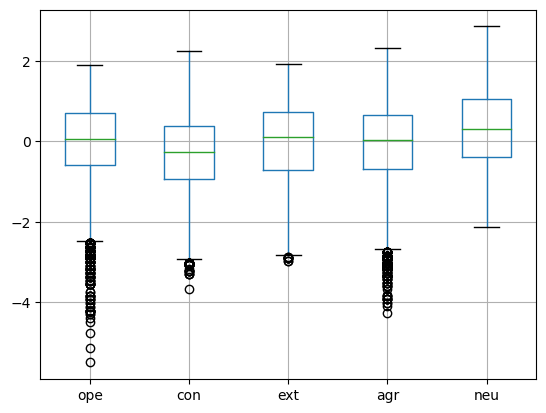

In [26]:
females_under_25[['ope', 'con', 'ext', 'agr', 'neu']].boxplot()

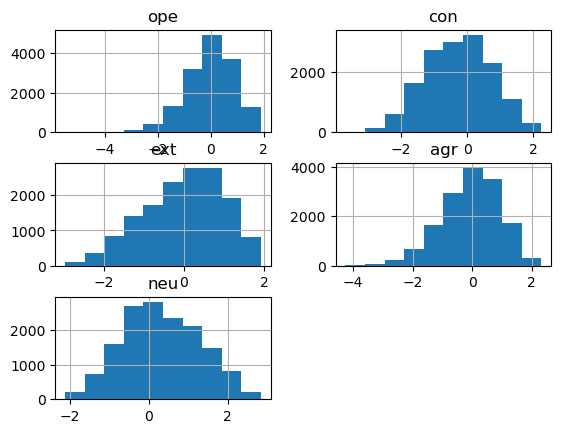

In [27]:
females_under_25[['ope', 'con', 'ext', 'agr', 'neu']].hist()
plt.show()

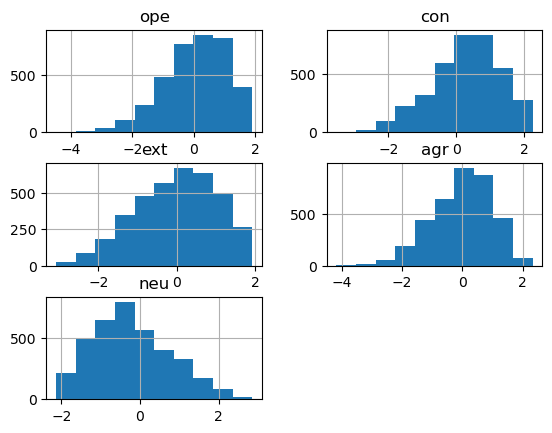

In [28]:
males_over_40[['ope', 'con', 'ext', 'agr', 'neu']].hist()
plt.show()

Our group "males over 40" scores higher on Conscientiousness and lower on "Neuroticism" than group "females under 25". However I would advise caution with interpretation of these results. More on that in notebook 3.

## Basic clustering

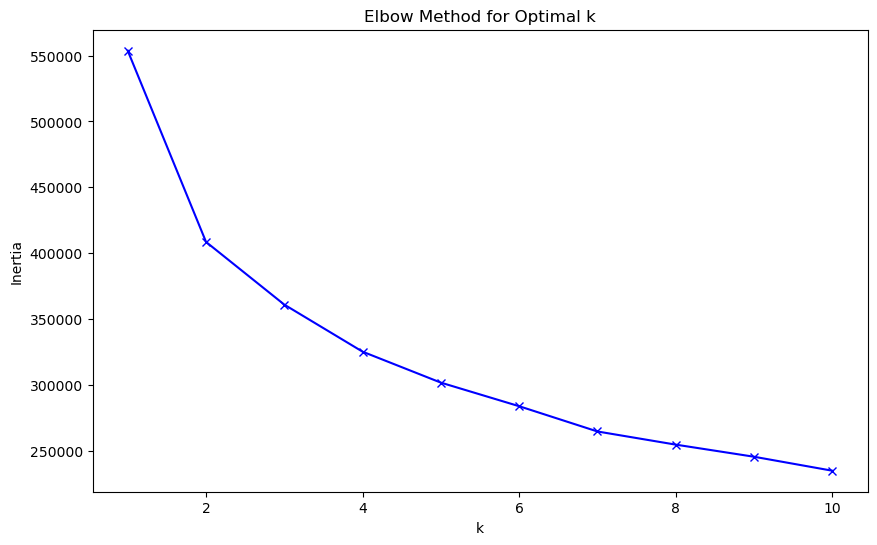

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardizing the features
scaler = StandardScaler()
users_scaled = scaler.fit_transform(users[big5_features])

# Elbow method
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(users_scaled)
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

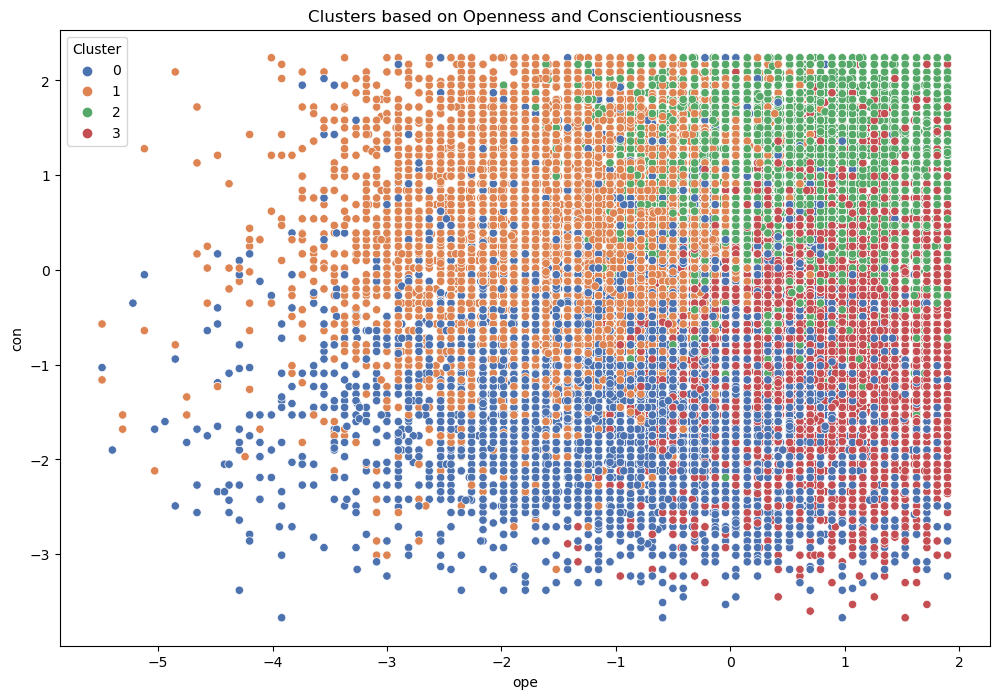

Cluster Means:
              ope       con       ext       agr       neu
Cluster                                                  
0       -0.345064 -0.788660 -1.094471 -0.920316  1.189828
1       -0.965388  0.339529 -0.252301  0.135320 -0.211497
2        0.496090  0.714407  0.754710  0.741836 -0.881201
3        0.657349 -0.454898  0.186370 -0.200138  0.241940


In [30]:
# Eyballed optimal_k
optimal_k = 4

# clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
users['Cluster'] = kmeans.fit_predict(users_scaled)

# Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=users, x='ope', y='con', hue='Cluster', palette='deep')
plt.title('Clusters based on Openness and Conscientiousness')
plt.show()

# Analyzing cluster characteristics
cluster_means = users.groupby('Cluster')[big5_features].mean()
print("Cluster Means:")
print(cluster_means)

<Figure size 1200x600 with 0 Axes>

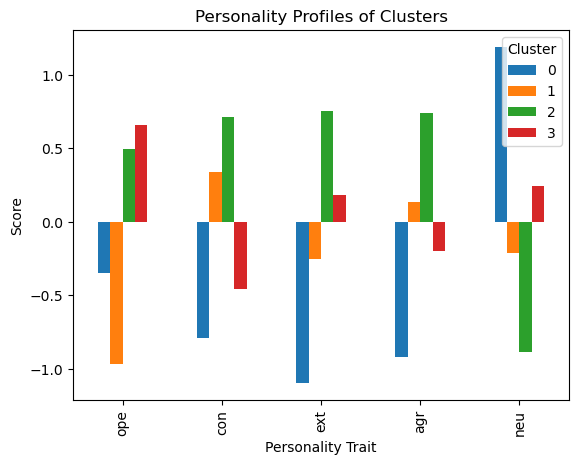

In [31]:
# Visualize cluster profiles
plt.figure(figsize=(12, 6))
cluster_means.T.plot(kind='bar')
plt.title('Personality Profiles of Clusters')
plt.ylabel('Score')
plt.xlabel('Personality Trait')
plt.legend(title='Cluster')
plt.show()